In [1]:
#Normal data 36-54-10 with for 90%(40%train,60%validation) and 10%test data
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import os

In [5]:
#changing the working directory
%cd /content/gdrive/My Drive/Thesis

/content/gdrive/My Drive/Thesis


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19
import cv2
import os
import random
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [9]:
data = get_data("/content/gdrive/My Drive/Thesis/flowers")

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



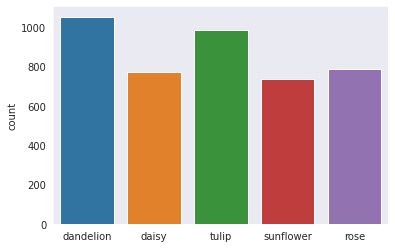

In [10]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

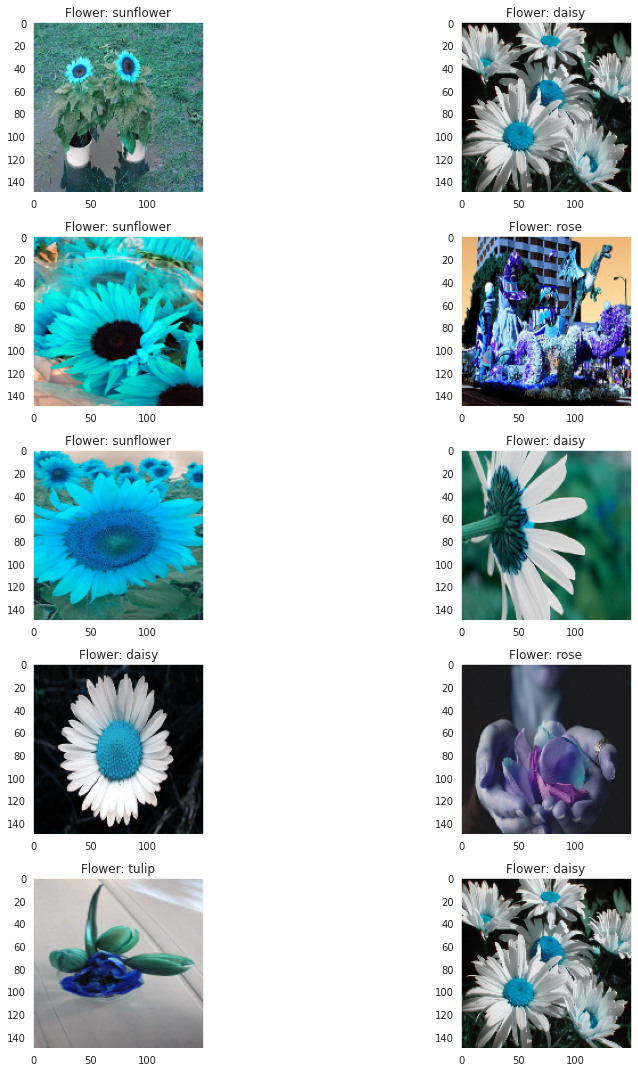

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])
        
plt.tight_layout()

In [12]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [13]:
# Normalize the data
x = np.array(x) / 255

In [14]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.1 , random_state = 42)

In [17]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size= 0.6, random_state = 42)

In [18]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 4th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 5th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 6th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Output layer
model.add(Dense(5,activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 128)       5

In [19]:
#defining early stopping
from keras.callbacks import ReduceLROnPlateau
learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.5, min_lr=0.000001)

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, mode='min')

In [20]:
!pip install h5py
	
	
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [21]:
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [22]:
#Fitting the augmentation data
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data = (x_val, y_val), callbacks = [learning_rate,es,mc])

Epoch 1/100
49/49 [==============================] - ETA: 0s - loss: 1.8062 - accuracy: 0.3895
Epoch 00001: val_accuracy improved from -inf to 0.23907, saving model to best_model.h5
49/49 [==============================] - 274s 6s/step - loss: 1.8062 - accuracy: 0.3895 - val_loss: 3.2019 - val_accuracy: 0.2391
Epoch 2/100
49/49 [==============================] - ETA: 0s - loss: 1.3773 - accuracy: 0.4974
Epoch 00002: val_accuracy did not improve from 0.23907
49/49 [==============================] - 276s 6s/step - loss: 1.3773 - accuracy: 0.4974 - val_loss: 4.3261 - val_accuracy: 0.2391
Epoch 3/100
49/49 [==============================] - ETA: 0s - loss: 1.1946 - accuracy: 0.5630
Epoch 00003: val_accuracy did not improve from 0.23907
49/49 [==============================] - 277s 6s/step - loss: 1.1946 - accuracy: 0.5630 - val_loss: 3.7626 - val_accuracy: 0.2391
Epoch 4/100
49/49 [==============================] - ETA: 0s - loss: 1.1076 - accuracy: 0.5829
Epoch 00004: ReduceLROnPlateau re

In [23]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.image as mimg

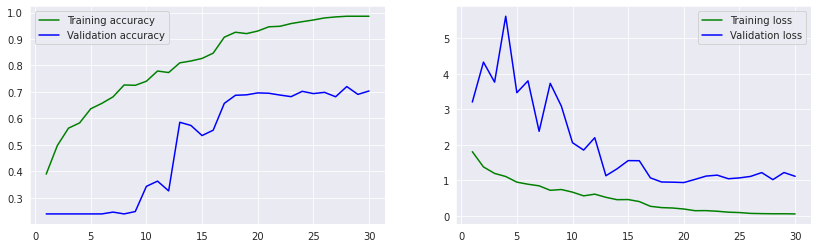

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, accuracy, 'g', label='Training accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'g', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [25]:
saved_model = tf.keras.models.load_model('best_model.h5')
print("Test Accuracy: {0:.2f}%".format(saved_model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

14/14 [==============================] - 12s 848ms/step - loss: 0.9862 - accuracy: 0.7252
Test Accuracy: 72.52%


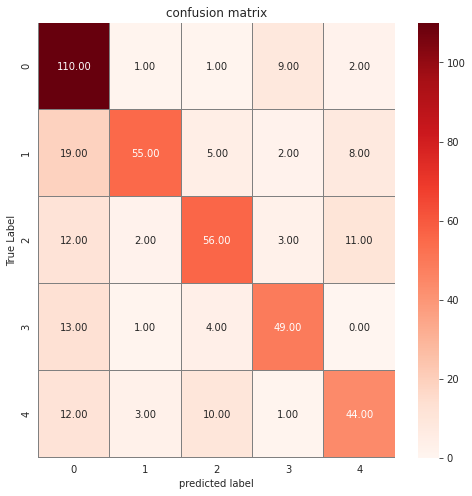

              precision    recall  f1-score   support

   dandelion       0.66      0.89      0.76       123
       daisy       0.89      0.62      0.73        89
       tulip       0.74      0.67      0.70        84
   sunflower       0.77      0.73      0.75        67
        rose       0.68      0.63      0.65        70

    accuracy                           0.73       433
   macro avg       0.75      0.71      0.72       433
weighted avg       0.74      0.73      0.72       433



In [26]:
from sklearn.metrics import confusion_matrix
Y_pred = saved_model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()



y_test_inv = label_binarizer.inverse_transform(y_test)
print(classification_report(y_test_inv, Y_pred_classes, target_names = labels))